In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape


(60000, 28, 28)

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

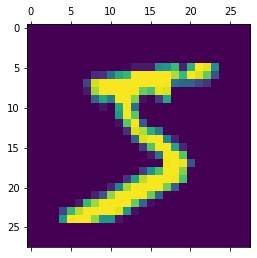

In [7]:
plt.matshow(x_train[0])

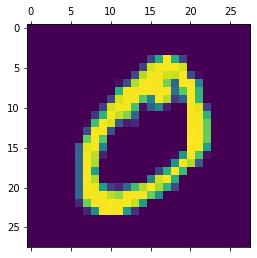

In [8]:
plt.matshow(x_train[1])

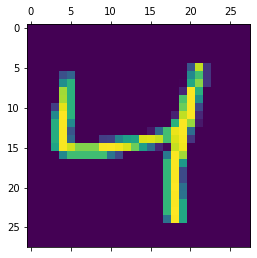

In [9]:
plt.matshow(x_train[2])

In [10]:
print(y_train[0])
print(y_train[1])
print(y_train[2])

5
0
4


Normal scaling of the data set to imporve the accuracy 
Why we are divinging by 255?
The reason is that the colour intensity is divided as 0 for Black that is minimum & 255 for white  that is maximum. Dividing by 255 standarize the scale of our data set between 0 and 1.



In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
## See all the data points  got scaled between 0 and 1
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
x_train_flat = x_train.reshape(len(x_train),28*28)

In [14]:
x_train_flat.shape

(60000, 784)

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
x_test_flat = x_test.reshape(len(x_test),28*28)

In [17]:
x_test_flat.shape

(10000, 784)

In [18]:
x_test_flat[0].shape

(784,)

In [19]:
### Just doing it for some extra clarification on metrics 
do = x_train_flat[0].reshape(1,784)

In [20]:
do

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [21]:
x_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Creating First Neural Network

In [22]:
model = keras.Sequential([
        keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid')
])
model.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'] 
              )
model.fit(x_train_flat, y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4665 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3039 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2830 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2731 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2667 - accuracy: 0.9262


In [23]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2686 - accuracy: 0.9244


[0.2685682475566864, 0.9243999719619751]

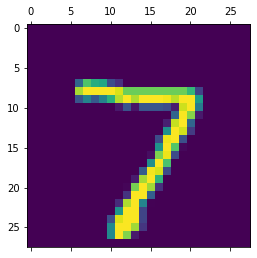

In [24]:
plt.matshow(x_test[0])

In [25]:
prediction = model.predict(x_test_flat)
prediction[0]

array([2.6893973e-02, 3.9332201e-07, 6.0108751e-02, 9.6371788e-01,
       1.4599860e-03, 1.2855342e-01, 1.3304746e-06, 9.9974298e-01,
       9.8733753e-02, 7.0707583e-01], dtype=float32)

In [26]:
np.argmax(prediction[0])

7

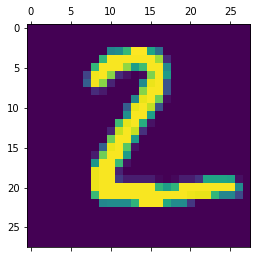

In [27]:
plt.matshow(x_test[1])

In [28]:
y_test[1]

2

In [29]:
prediction[1]

array([3.8858223e-01, 5.7433248e-03, 9.9941027e-01, 3.1134522e-01,
       4.5960652e-10, 8.1222928e-01, 8.9653087e-01, 7.0255233e-13,
       2.2912982e-01, 2.1042210e-09], dtype=float32)

Getting the number out of the prediction made by the neural network 

In [30]:
y_predicted = [np.argmax(i) for i in prediction]

In [31]:
y_predicted[ :5]

[7, 2, 1, 0, 4]

In [32]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [33]:
np.argmax(prediction[1])

2

In [34]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   8,    9,  912,   18,    6,    5,   12,   12,   46,    4],
       [   3,    0,   14,  918,    0,   27,    2,   13,   26,    7],
       [   2,    1,    6,    2,  899,    0,   12,    4,   10,   46],
       [   9,    3,    1,   32,    6,  775,   15,    6,   38,    7],
       [  13,    3,    6,    1,    7,   14,  910,    2,    2,    0],
       [   1,    5,   22,    6,    2,    1,    0,  950,    3,   38],
       [   9,    7,    6,   20,    9,   21,    9,   11,  875,    7],
       [  11,    7,    1,    9,   15,    6,    0,   25,    7,  928]],
      dtype=int32)>

Text(114.0, 0.5, 'Truth')

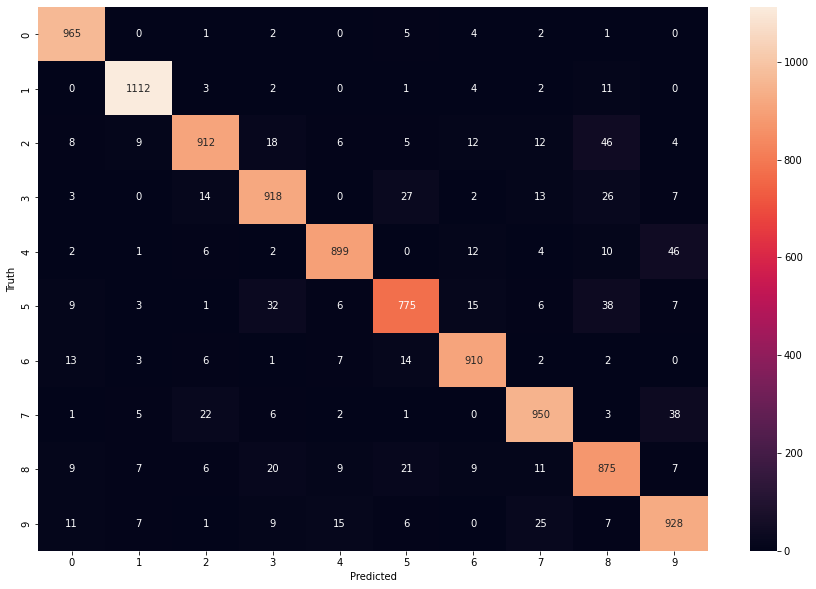

In [35]:
import seaborn as sn
plt.figure(figsize=(15,10))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Creating New Neural Network**
Adding one more layer to it

In [36]:
model_2 = keras.Sequential([
        keras.layers.Dense(100, input_shape = (784, ), activation = 'relu'),
        keras.layers.Dense(10, activation = "sigmoid")
])
model_2.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'] 
              )
model_2.fit(x_train_flat, y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2719 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1225 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0872 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9836


In [37]:
model_2.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9772


[0.0747767984867096, 0.9771999716758728]

In [38]:
predicted_2 = model_2.predict(x_test_flat)

In [39]:
y_predicted_2 = [np.argmax(i) for i in predicted_2]

In [40]:
cm_2 = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_2)
cm_2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    1,    0,    2,    3,    1,    1,    1],
       [   0, 1122,    3,    1,    0,    1,    3,    1,    4,    0],
       [   4,    1, 1006,    9,    1,    1,    2,    2,    5,    1],
       [   0,    0,    5,  993,    1,    3,    0,    5,    2,    1],
       [   0,    0,    4,    0,  959,    0,    3,    1,    1,   14],
       [   3,    0,    1,   15,    3,  859,    2,    1,    5,    3],
       [   3,    3,    1,    1,    5,    4,  941,    0,    0,    0],
       [   0,    5,   12,    1,    0,    0,    0, 1003,    1,    6],
       [   3,    0,    5,   10,    4,    1,    4,    6,  938,    3],
       [   1,    3,    0,    8,    6,    1,    1,    6,    2,  981]],
      dtype=int32)>

Text(114.0, 0.5, 'Truth')

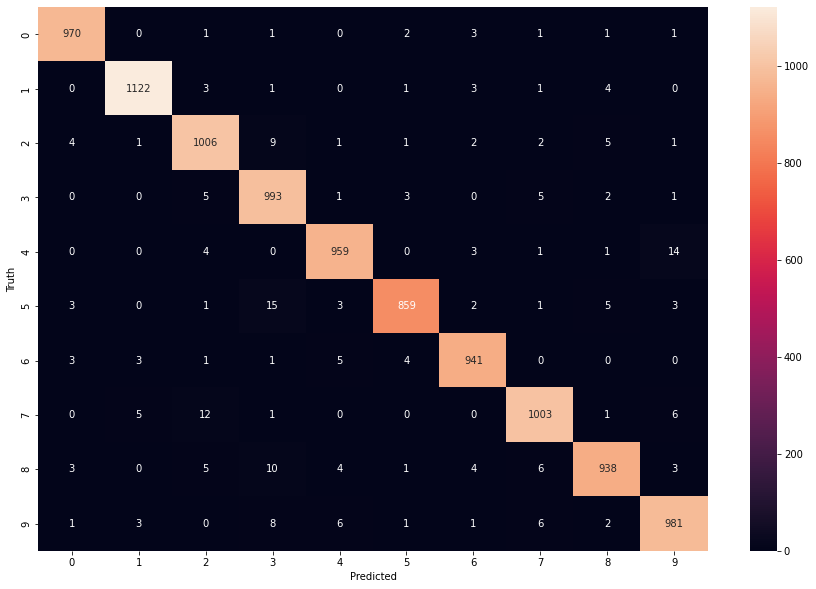

In [41]:
import seaborn as sn
plt.figure(figsize=(15,10))
sn.heatmap(cm_2, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')